In [1]:
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
import cv2

plt.rcParams["savefig.bbox"] = 'tight'

In [2]:
# Viewing a sample image 
image_path = "C:\Users\egs-admin\Desktop\animals\Images\training\gull\armeniangull_1.jpeg"
image = cv2.imread(image_path, 1)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Resizing an image
image = cv2.resize(image, (160, 160), interpolation = cv2.INTER_AREA)

plt.imshow(image)
plt.show

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (3141471506.py, line 2)

In [18]:
import os
import torch
import numpy as np
import torchvision
import torchvision.transforms as transforms
from torchvision.utils import save_image

torch.manual_seed(0)

In [3]:
os.listdir(r'C:\Users\egs-admin\Desktop\animals\Images\training')
training_dataset_path = r'C:\Users\egs-admin\Desktop\animals\Images\training'

training_transforms = transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor()])

train_dataset = torchvision.datasets.ImageFolder(root = training_dataset_path, transform = training_transforms)
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size=32, shuffle=False)

NameError: name 'os' is not defined

In [5]:
def get_mean_and_std(loader):
    mean = 0.
    std = 0.
    total_images_count = 0
    for images, _ in loader:
        image_count_in_a_batch = images.size(0)
        images = images.view(image_count_in_a_batch, images.size(1), -1)
        mean += images.mean(2).sum(0)
        std += images.std(2).sum(0)
        total_images_count += image_count_in_a_batch
    
    mean /= total_images_count
    std /= total_images_count
    
    return mean, std


train_mean, train_std = get_mean_and_std(train_loader)
print(train_mean, train_std)

tensor([0.5051, 0.4948, 0.4669]) tensor([0.1918, 0.1802, 0.1812])


In [6]:
train_transforms = transforms.Compose([
    transforms.Resize(size=(160,160)),
    transforms.ColorJitter(brightness=(0.8,1.5), contrast = 0.25 ,saturation = 0.25, hue=0.25),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(20),
    transforms.RandomPerspective(distortion_scale=0.2, p=0.2),
    transforms.ToTensor(),
#     transforms.Normalize(mean=train_mean, std=train_std)
])

val_transforms = transforms.Compose([
    transforms.Resize(size=(160,160)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(10),
    transforms.RandomPerspective(distortion_scale=0.2, p=0.2),
    transforms.ToTensor(),
#     transforms.Normalize(mean=train_mean, std=train_std)
])

In [7]:
validation_dataset_path = r'C:\Users\egs-admin\Desktop\animals\Images\validation'

validation_transforms = transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor()])

val_dataset = torchvision.datasets.ImageFolder(root = validation_dataset_path, transform = validation_transforms)
val_loader = torch.utils.data.DataLoader(dataset = val_dataset, batch_size=32, shuffle=False)

labels:  tensor([1, 1, 1, 0, 0, 1])


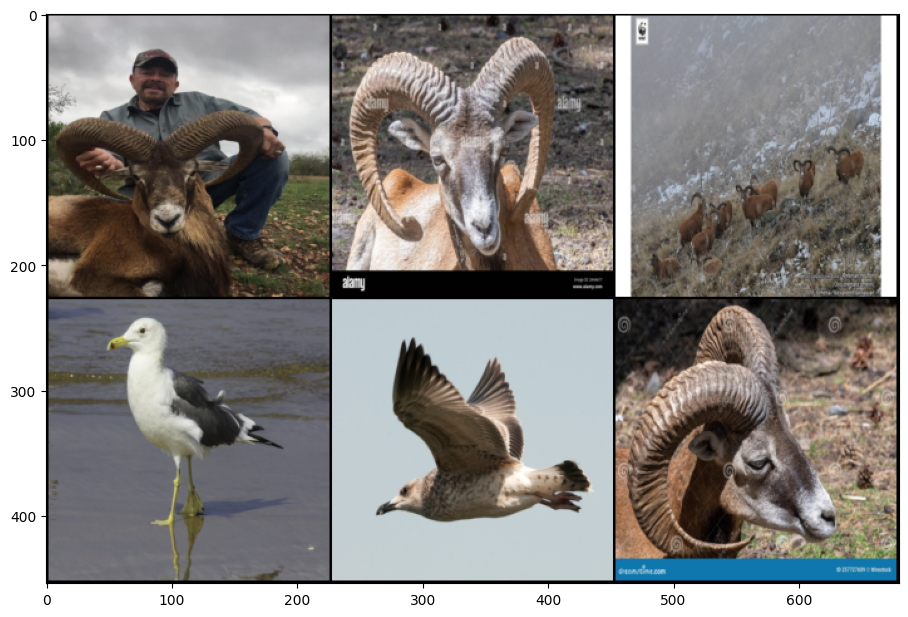

In [8]:
def show_transformed_images(dataset):
    loader = torch.utils.data.DataLoader(dataset, batch_size = 6, shuffle=True)
    batch = next(iter(loader))
    images, labels = batch
    
    grid = torchvision.utils.make_grid(images, nrow = 3)
    plt.figure(figsize=(11,11))
    plt.imshow(np.transpose(grid, (1,2,0)))
    print('labels: ', labels)

show_transformed_images(train_dataset)

labels:  tensor([0, 0, 0, 1, 1, 0])


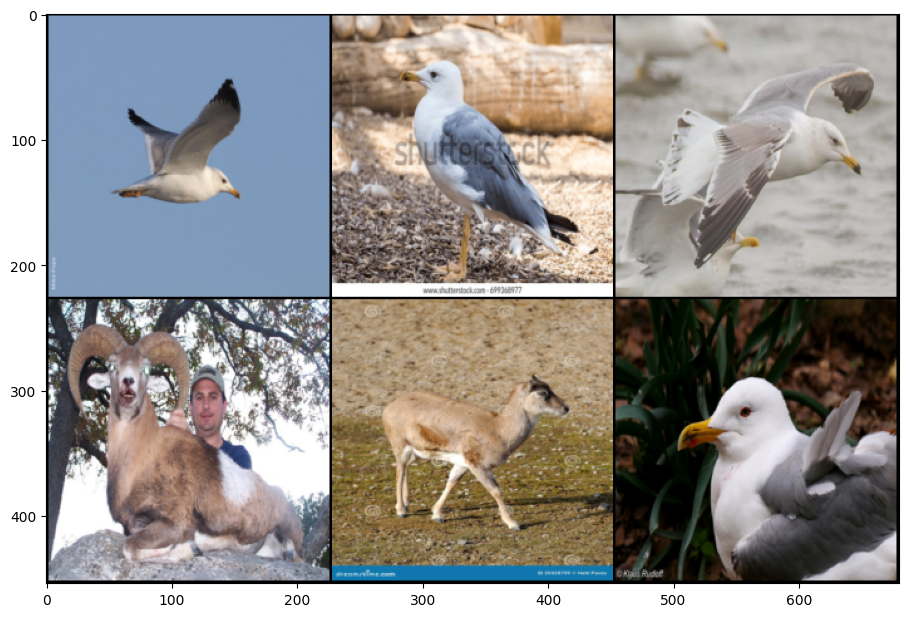

In [9]:
show_transformed_images(val_dataset)

In [10]:
root_dir_name = 'C:\Users\egs-admin\Desktop\animals\augmented'
os.mkdir(f'{root_dir_name}')
os.mkdir(f'{root_dir_name}/train')
os.mkdir(f'{root_dir_name}/train/gull')
os.mkdir(f'{root_dir_name}/train/mouflon')
os.mkdir(f'{root_dir_name}/val')
os.mkdir(f'{root_dir_name}/val/gull')
os.mkdir(f'{root_dir_name}/val/mouflon')

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (2970495038.py, line 1)

In [11]:
index_mouflon = 0
index_gull = 0
for _ in range(10):
    for img, label in train_dataset:
        if label == 0:
            save_image(img, f'{root_dir_name}/train/mouflon/mouflon_{index_mouflon}.jpg')
            index_mouflon += 1
        elif label == 1:
            save_image(img, f'{root_dir_name}/train/gull/gull_{index_gull}.jpg')
            index_gull += 1

NameError: name 'root_dir_name' is not defined

In [12]:
index_mouflon = 0
index_gull = 0
for _ in range(10):
    for img, label in val_dataset:
        if label == 0:
            save_image(img, f'{root_dir_name}/val/mouflon/mouflon_{index_mouflon}.jpg')
            index_mouflon += 1
        elif label == 1:
            save_image(img, f'{root_dir_name}/val/gull/gull_{index_gull}.jpg')
            index_gull += 1

NameError: name 'root_dir_name' is not defined

In [ ]:
import pandas as pd
from ultralytics import YOLO

In [ ]:
model = YOLO('yolov8x-cls.pt')

In [ ]:
results = model.train(data='C:\Users\egs-admin\Desktop\animals\Images', epochs=5, imgsz=160)

In [ ]:
results = model.val()